# Data Pre-processing for Group assignment

## Part 1: Formatting and merge datasets

In this part, we will tidy the form of two raw datasets, and finally merge them into one dataset.

### 1.1  Formatting Food Security Indicators dataset

***Import libraries and read dataset***

In [1]:
import numpy as np
import pandas as pd
df1=pd.read_csv('ASEAN_Food Security Indicators-raw.csv')
df1.head()

***Drop useless or duplicated columns***

In [3]:
df1=df1.drop(['Domain Code', 'Domain','Area Code (FAO)', 'Year Code','Element Code','Element',
            'Item Code','Unit', 'Flag',
              'Flag Description','Note'], axis=1)
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2000-2002,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001-2003,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002-2004,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003-2005,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004-2006,127


***Deal with NAs***

In [97]:
# Compute missing values
df1.isnull().sum().sum()

2396

In [5]:
# Impute missing values to 0 temporarily
df1.fillna(0,inplace=True)
print(df1.isnull().sum())

Area     0
Item     0
Year     0
Value    0
dtype: int64


***Formatting columns***

In [6]:
# Formatting 'Year' column
for i in range(len(df1)):
    if len(df1.iloc[i,2])==9:
        df1.iloc[i,2]=int((int(df1.iloc[i,2][0:4])+int(df1.iloc[i,2][5:]))/2)
        pass
    elif len(df1.iloc[i,2])==4:
        df1.iloc[i,2]=int(df1.iloc[i,2])
        pass
    else:
        print('There is an error in Year column')
        pass
    pass
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2005,127


In [7]:
# Formatting 'Value' column
df1['Value'] = df1.Value.apply(str)
index = df1[df1['Value'].str.contains('<'or'>')].index
for i in index:
    df1.iloc[i,3] = df1.iloc[i,3][1:]
    pass
df1['Value'] = pd.to_numeric(df1['Value'], downcast='float')

In [10]:
# values in 'Item' column contains variables we need to analysis
# should be transferred to key:value format
print(len(df1.Item.unique()))     #compute variable numbers
# Transferred Item
from pandas import pivot
df1=df1.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df1=df1.reset_index()
df1.head()

42


Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of exclusive breastfeeding among infants 0-5 months of age,Prevalence of low birthweight (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,17.100000,NaN,10.3,NaN,7.2,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,16.600000,NaN,9.5,NaN,7.5,NaN,2.6,NaN,50.0,5.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,16.299999,NaN,9.2,NaN,7.9,NaN,2.5,NaN,48.0,4.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,16.000000,NaN,9.1,NaN,8.2,NaN,2.5,NaN,47.0,4.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,15.700000,NaN,9.2,NaN,8.6,NaN,2.5,NaN,46.0,4.0


### 1.2 Formatting Consumer Price indices dataset

***Read dataset***

In [11]:
df2=pd.read_csv('ASEAN_Consumer Price Indices-raw.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,96,Brunei Darussalam,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,88.959933,F,FAO estimate,base year is 2015
1,CP,Consumer Price Indices,96,Brunei Darussalam,2001,2001,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.702503,F,FAO estimate,base year is 2015
2,CP,Consumer Price Indices,96,Brunei Darussalam,2002,2002,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.146512,F,FAO estimate,base year is 2015
3,CP,Consumer Price Indices,96,Brunei Darussalam,2003,2003,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.365320,F,FAO estimate,base year is 2015
4,CP,Consumer Price Indices,96,Brunei Darussalam,2004,2004,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.822766,F,FAO estimate,base year is 2015


***Drop useless or duplicated variables***

In [12]:
df2=df2.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
df2.head()

,Area,Year,Item,Months,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",January,88.959933
1,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",January,89.702503
2,Brunei Darussalam,2002,"Consumer Prices, Food Indices (2015 = 100)",January,90.146512
3,Brunei Darussalam,2003,"Consumer Prices, Food Indices (2015 = 100)",January,90.365320
4,Brunei Darussalam,2004,"Consumer Prices, Food Indices (2015 = 100)",January,89.822766


In [13]:
# split 'Months' column into separate columns
from pandas import pivot
df2=df2.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
df2=df2.reset_index()
df2.head()

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571


In [14]:
# impute na using mean method
df2_1=df2.iloc[:,3:15]
a1=np.where(np.isnan(df2_1))[0]
a2=np.where(np.isnan(df2_1))[1]
for i in a1:
    for j in a2:
        df2_1.iloc[i,j]=df2_1.iloc[i].mean()

In [15]:
# add new column by mean value of months
df2['Value']=df2_1.apply(lambda x: x.mean(),axis=1)

In [16]:
# drop months columns
df2=df2.drop(['January','February','March','April','May','June','July','August','September','October','November','December'], axis=1)
df2.head()

Months,Area,Year,Item,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",95.709930
4,Brunei Darussalam,2001,Food price inflation,0.671642


In [17]:
# split the 'Item' column into Food Indices, General Indices, and inflation rates
df2=df2.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df2=df2.reset_index()
df2.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


### 1.3 Combine two datasets

In [18]:
#combine two dataframes
data=pd.merge(df1,df2,on=['Area','Year'],sort=True)
data.head()

Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,NaN,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,NaN,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,NaN,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,NaN,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782


### 1.4 Save data

In [19]:
data.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-merged.csv',index=False)

## Part 2: Handle missing data

In this part, we use Random Forest Regressor model combined mean method to impute missing values.

### 2.1 Initial understanding of the dataset

***Import libraries and read dataset***

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-merged.csv')
df.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,NaN,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.7,87.4,45.4,81.0,100.0,0.21,...,NaN,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,2337.0,125.0,78.7,89.7,47.7,85.0,99.6,0.21,...,NaN,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,2345.0,127.0,81.7,90.3,48.3,86.0,95.7,0.21,...,NaN,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,2352.0,127.0,81.0,88.6,47.3,76.0,93.8,0.21,...,NaN,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782


***See the dimension of dataset***

In [22]:
print('The dataset contains', np.shape(df)[0], 'rows and', np.shape(df)[1], 'columns.')

The dataset contains 210 rows and 47 columns.


***See the distribution of missing data***

We imputed some missing values by zero for necessary when formatting the dataset, now first we change them back to NaNs.

In [23]:
for i in range(np.shape(df)[0]):
    for j in range(np.shape(df)[1]):
        if df.iloc[i,j] == 0:
            df.iloc[i,j] = float('NaN')

In [87]:
# Calculate total NAs
df.isnull().sum().sum()

2520

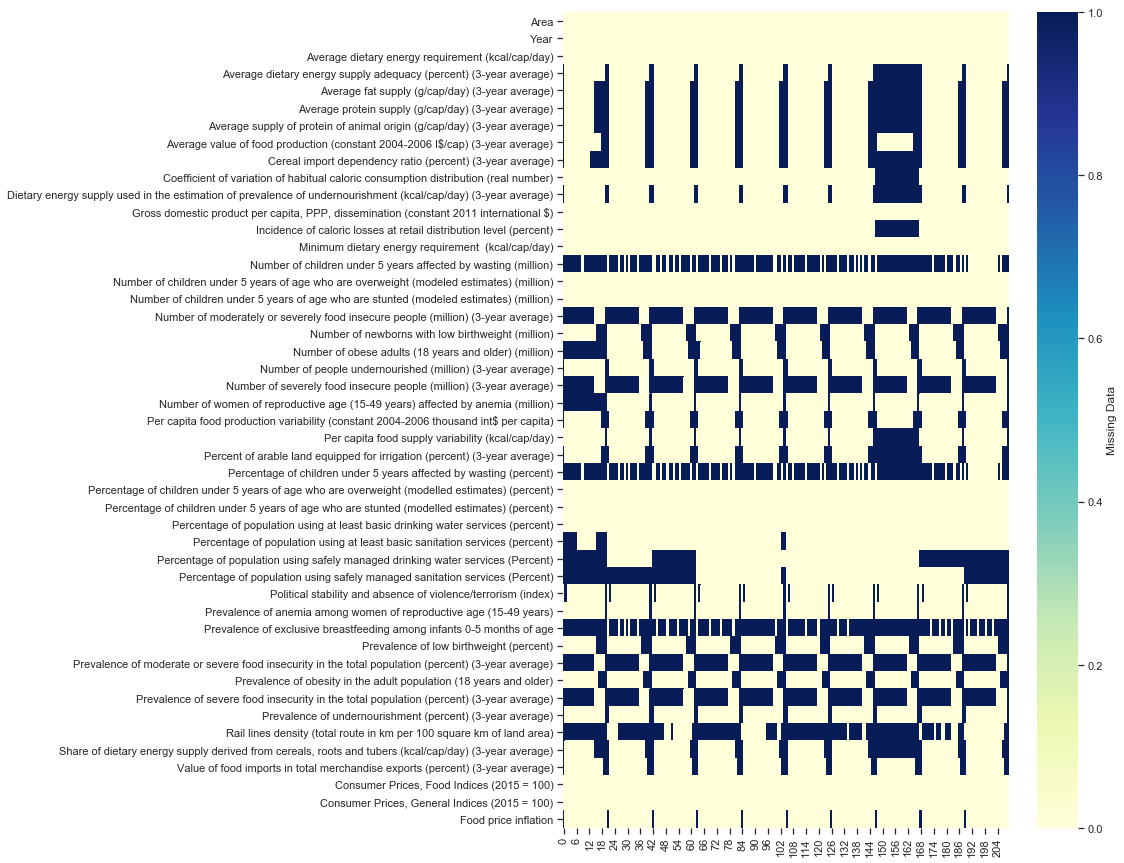

In [94]:
# Visualizing Missing Data using Seaborn heatmap()
plt.figure(figsize=(10,15))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### 2.2 Imputation of missing data

#### Step 1: test correlation between complete columns and incomplete columns

*Convert string variables into categorical numeric variables*

In [95]:
# create a categorical numeric variable to result 'Area' into groups
df['Area_cat'] = df['Area'].astype('category')
df['Area_cat'] = df['Area_cat'].cat.codes
# reindex dataset
df = df.reindex(columns = df.columns)
# create df1 with no str variables to test correlation
df1 = df.drop('Area', axis = 1)

*Create correlation table*

In [96]:
# The function creates table shows Pearson Correlation Coefficient (PCC) between complete vars and incomplete vars.
def create_correlation_table(df):
    complete_col = df.loc[:,df.isnull().sum() == 0].columns
    incomplete_col=df.loc[:,df.isnull().sum() != 0].columns
    li1 = []; li2 = []; li3 = []
    for i in incomplete_col:
        for j in complete_col:
            li1.append(i)
            li2.append(j)
            li3.append(df[i].corr(df[j]))
    df_r = {'Incomplete Variables':li1,
           'Complete Variables':li2,
           'PCC':li3}
    df_r = pd.DataFrame(df_r)
    return df_r
df1_r = create_correlation_table(df1) 
df1_r.head()

,Incomplete Variables,Complete Variables,PCC
0,Average dietary energy supply adequacy (percen...,Year,0.563240
1,Average dietary energy supply adequacy (percen...,Average dietary energy requirement (kcal/cap/day),0.376543
2,Average dietary energy supply adequacy (percen...,"Gross domestic product per capita, PPP, dissem...",0.587843
3,Average dietary energy supply adequacy (percen...,Minimum dietary energy requirement (kcal/cap/...,0.373129
4,Average dietary energy supply adequacy (percen...,Number of children under 5 years of age who ar...,0.152125


#### Step 2: create and test model

We create a model to impute NAs base on *Seaborn Random Forest Regressor*, using *Mean Square Error* to test model.

*Some introduction of the model:*

     X_train - This includes all independent variables, will be used to train the model.
     
     X_test - The remaining portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
     
     y_train - This is dependent variable which needs to be predicted by this model, including category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.
     
     y_test - This data has category labels for the test data, these labels will be used to test the accuracy between actual and predicted categories.

In [52]:
# This function is used to test model by Mean Square Error (MSE).
def test_model(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')     # ignore warning message
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, random_state = 42)    # n_splits = number of folds, random_state ensure the splits are reproducible
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    
    # get absolute value of PCC to select 3 strongest correlated vars of each incomplete var
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PCC)):
            if df_r.PCC[index] < 0:
                df_neg2pos.PCC[index] = -df_r.PCC[index]
                
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        y_pred_rf = []
        y_true_rf = []
        df_split = df_neg2pos[df_neg2pos.iloc[:,0] == i]     # split correlation table by each incomplete variable
        df_split.sort_values(by = ['PCC'], ascending = False, inplace = True)   # sort PCC of each i in incomplete_col
        # correlation-based feature selection
        features = list(df_split.iloc[:3,1].values)       # add 3 strongest correlated vars of each i into features
        features.append('Area_cat')                   # add features
        features.append('Year')                      # add features
        features = list(dict.fromkeys(features))           #de‑duplicate
        for train_index,test_index in kf.split(df_filter):
            df_test = df_filter.iloc[test_index]
            df_train = df_filter.iloc[train_index]
            # X - input, y - output
            X_train = np.array(df_train[features])     
            y_train = np.array(df_train[i])            # the label of each instance
            X_test = np.array(df_test[features])     
            y_test = np.array(df_test[i])        # the set of labels to all the data in x_test
            model = RandomForestRegressor(n_estimators = 200, max_depth = 100, random_state = 42)
            model.fit(X_train,y_train)
            y_pred_rf.append(model.predict(X_test)[0])
            y_true_rf.append(y_test[0])
        print('Mean Square Error(Random Forest) for',i,':',mean_squared_error(y_pred_rf,y_true_rf).round(3))
test_model(df1,df1_r)

Mean Square Error(Random Forest) for Average dietary energy supply adequacy (percent) (3-year average) : 27.802
Mean Square Error(Random Forest) for Average fat supply (g/cap/day) (3-year average) : 105.646
Mean Square Error(Random Forest) for Average protein supply (g/cap/day) (3-year average) : 55.218
Mean Square Error(Random Forest) for Average supply of protein of animal origin (g/cap/day) (3-year average) : 9.472
Mean Square Error(Random Forest) for Average value of food production (constant 2004-2006 I$/cap) (3-year average) : 10219.342
Mean Square Error(Random Forest) for Cereal import dependency ratio (percent) (3-year average) : 609.244
Mean Square Error(Random Forest) for Coefficient of variation of habitual caloric consumption distribution (real number) : 0.0
Mean Square Error(Random Forest) for Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average) : 7331.578
Mean Square Error(Random Forest) for Incidence of caloric lo

As shown above, the model for most incomplete variables performs good, while for others it has large mean-squared errors. So I plan to use mean by Area to impute the NaNs of those variables as they don't have large miss values.

#### Step 3: Deal with those variables with bad model performance but less missing values

In [65]:
# get index
df2=df1.copy()
print(df2.columns.get_loc('Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)'),
      df2.columns.get_loc('Number of newborns with low birthweight (million)'),
      df2.columns.get_loc('Average value of food production (constant 2004-2006 I$/cap) (3-year average)'),
      df2.columns.get_loc('Cereal import dependency ratio (percent) (3-year average)'))

9 17 6 7


In [66]:
# fill na by Area mean
df2.iloc[:,9] = df2.iloc[:,9].fillna(df2.groupby('Area_cat')['Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)'].transform('mean'))
df2.iloc[:,17] = df2.iloc[:,17].fillna(df2.groupby('Area_cat')['Number of newborns with low birthweight (million)'].transform('mean'))
df2.iloc[:,6] = df2.iloc[:,6].fillna(df2.groupby('Area_cat')['Average value of food production (constant 2004-2006 I$/cap) (3-year average)'].transform('mean'))
df2.iloc[:,7] = df2.iloc[:,7].fillna(df2.groupby('Area_cat')['Cereal import dependency ratio (percent) (3-year average)'].transform('mean'))
df2_r=create_correlation_table(df2)

#### Step 4: impute NaNs using Random Forest Regressor model

In [67]:
def Impute_NaN(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PCC)):
            if df_r.PCC[index] < 0:
                df_neg2pos.PCC[index] = -df_r.PCC[index]
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        #df_filter = df[df[i] > 0].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        df_split = df_neg2pos[df_neg2pos.iloc[:,0]==i]
        df_split.sort_values(by = ['PCC'], ascending = False, inplace = True)
        features = list(df_split.iloc[:3,1].values)
        features.append('Area_cat')
        features.append('Year')
        features = list(dict.fromkeys(features))
        X_test_rf = np.array(df_missing[features])
        X_train_rf = np.array(df_filter[features])
        y_train_rf = np.array(df_filter[i])
        model_rf = RandomForestRegressor(n_estimators=200, max_depth=100, random_state=42)
        model_rf.fit(X_train_rf,y_train_rf)
        y_test_rf = model_rf.predict(X_test_rf)
        df.loc[df[i].isnull(),i] = y_test_rf
    return df

In [68]:
Impute_NaN(df2,df2_r)

,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Area_cat
0,2000,2323.0,123.77,78.2105,87.8440,46.3130,93.000000,94.133333,0.21,3024.157895,...,7.2000,6.4090,2.563,0.4910,48.335,4.575,89.312189,95.142982,0.484959,0
1,2001,2329.0,123.00,75.7000,87.4000,45.4000,81.000000,100.000000,0.21,2859.000000,...,7.5000,6.4090,2.600,0.4910,50.000,5.000,89.911821,95.709930,0.671642,0
2,2002,2337.0,125.00,78.7000,89.7000,47.7000,85.000000,99.600000,0.21,2923.000000,...,7.9000,6.4090,2.500,0.4910,48.000,4.000,90.286058,93.494272,0.416298,0
3,2003,2345.0,127.00,81.7000,90.3000,48.3000,86.000000,95.700000,0.21,2971.000000,...,8.2000,6.4090,2.500,0.4910,47.000,4.000,90.033759,93.743590,-0.279126,0
4,2004,2352.0,127.00,81.0000,88.6000,47.3000,76.000000,93.800000,0.21,2996.000000,...,8.6000,6.4090,2.500,0.4910,46.000,4.000,90.485887,94.530500,0.503782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2016,2302.0,125.00,80.4000,94.3000,37.3000,201.000000,4.900000,0.28,2864.000000,...,2.1000,1.7075,7.800,0.8000,54.000,6.000,102.363624,102.668808,2.363180,9
206,2017,2299.0,126.00,83.4000,96.0000,37.7000,99.000000,8.300000,0.28,2892.000000,...,2.2200,0.5000,7.200,0.7000,53.000,6.000,101.258549,106.283014,-1.072609,9
207,2018,2297.0,127.00,81.5115,89.0855,35.0465,250.823529,-8.464706,0.28,2915.000000,...,2.8220,0.5000,6.800,0.7000,52.730,5.000,104.536628,110.045037,3.254676,9
208,2019,2295.0,127.00,81.8700,88.6530,34.3115,250.823529,-8.464706,0.28,2921.000000,...,3.2635,0.5000,6.700,0.7135,52.485,5.395,108.797175,113.121703,4.078947,9


*Count NaNs after imputation*

In [69]:
df2.isnull().sum().sum()

0

*Add 'Area' column to cleaned dataset (df2)*

In [71]:
df_Area = pd.DataFrame(df.iloc[:,0])
df_cleaned = df_Area.join(df2)
df_cleaned.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Area_cat
0,Brunei Darussalam,2000,2323.0,123.77,78.2105,87.844,46.313,93.0,94.133333,0.21,...,7.2,6.409,2.563,0.491,48.335,4.575,89.312189,95.142982,0.484959,0
1,Brunei Darussalam,2001,2329.0,123.00,75.7000,87.400,45.400,81.0,100.000000,0.21,...,7.5,6.409,2.600,0.491,50.000,5.000,89.911821,95.709930,0.671642,0
2,Brunei Darussalam,2002,2337.0,125.00,78.7000,89.700,47.700,85.0,99.600000,0.21,...,7.9,6.409,2.500,0.491,48.000,4.000,90.286058,93.494272,0.416298,0
3,Brunei Darussalam,2003,2345.0,127.00,81.7000,90.300,48.300,86.0,95.700000,0.21,...,8.2,6.409,2.500,0.491,47.000,4.000,90.033759,93.743590,-0.279126,0
4,Brunei Darussalam,2004,2352.0,127.00,81.0000,88.600,47.300,76.0,93.800000,0.21,...,8.6,6.409,2.500,0.491,46.000,4.000,90.485887,94.530500,0.503782,0


*Some visualisation of cleaned dataset*

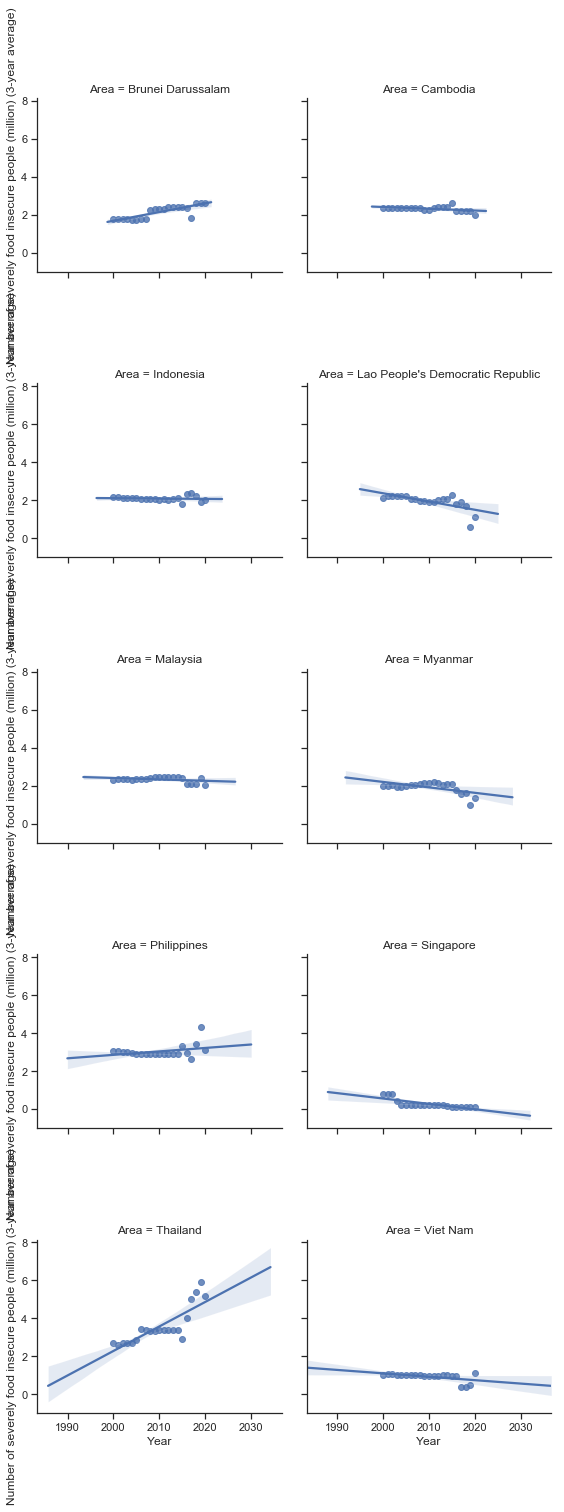

In [72]:
import seaborn as sns
sns.set(style = 'ticks')
sns.lmplot(x = 'Year',
           y = 'Number of severely food insecure people (million) (3-year average)',
           col = 'Area',
           data = df_cleaned,
           col_wrap = 2,
           height = 4)

##### Split into different datasets by Area （Optional）

In [84]:
data = np.array_split(df_cleaned, 10)
df_Brunei = data[0].iloc[:,1:-1]
df_Cambodia = data[1].iloc[:,1:-1]
df_Indonesia = data[2].iloc[:,1:-1]
df_Lao = data[3].iloc[:, 1:-1]
df_Malaysia = data[4].iloc[:,1:-1]
df_Myanmar = data[5].iloc[:,1:-1]
df_Philippines = data[6].iloc[:,1:-1]
df_Singapore = data[7].iloc[:,1:-1]
df_Thailand = data[8].iloc[:,1:-1]
df_VietNam = data[9].iloc[:,1:-1]

##### Save data

In [86]:
df_cleaned.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-cleaned.csv',index=False)
# df_Brunei.to_csv(r'Brunei_Consumer Price&Food Security Indicators.csv',index=False)
# df_Cambodia.to_csv(r'Cambodia_Consumer Price&Food Security Indicators.csv',index=False)
# df_Indonesia.to_csv(r'Indonesia_Consumer Price&Food Security Indicators.csv',index=False)
# df_Lao.to_csv(r'Lao_Consumer Price&Food Security Indicators.csv',index=False)
# df_Malaysia.to_csv(r'Malaysia_Consumer Price&Food Security Indicators.csv',index=False)
# df_Myanmar.to_csv(r'Myanmar_Consumer Price&Food Security Indicators.csv',index=False)
# df_Philippines.to_csv(r'Philippines_Consumer Price&Food Security Indicators.csv',index=False)
# df_Singapore.to_csv(r'Singapore_Consumer Price&Food Security Indicators.csv',index=False)
# df_Thailand.to_csv(r'Thailand_Consumer Price&Food Security Indicators.csv',index=False)
# df_VietNam.to_csv(r'VietNam_Consumer Price&Food Security Indicators.csv',index=False)